In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
query_url = base_url + city +'&units=imperial' + '&appid=' + weather_api

# Print the city count to confirm sufficient count
len(cities)

591

In [3]:
#Empty lists for my variables
cloudiness = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
country = []
city_column = []

count = 0
sets = 1

In [4]:
#cities


In [5]:
#Run the API call for each city
print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    response = requests.get(query_url)
    weather_json = response.json()
    if count < 50:
            count += 1
    else:
            sets += 1
            count = 0
    print(f"Processing Record {count} of Set {sets} | {city}")
    try:
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        max_temp.append(weather_json['main']['temp_max'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        wind_speed.append(weather_json['wind']['speed'])
        city_column.append(city)
    except:
        print('City not found. Skipping...')
    pass
print('------------------------------')
print('Data Retrieval Complete')
print('------------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | grand river south east
Processing Record 6 of Set 1 | yarmouth
Processing Record 7 of Set 1 | yulara
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | tabiauea
Processing Record 10 of Set 1 | la ronge
Processing Record 11 of Set 1 | bytow
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | high prairie
Processing Record 15 of Set 1 | victoria
Processing Record 16 of Set 1 | illoqqortoormiut
Processing Record 17 of Set 1 | itarema
Processing Record 18 of Set 1 | ondjiva
Processing Record 19 of Set 1 | kondagaon
Processing Record 20 of Set 1 | ardmore
Processing Record 21 of Set 1 | kurumkan
Processing Record 22 of Set 1 | bambous virieux
Processing Record 23 of Set 1 | 

Processing Record 47 of Set 4 | kizukuri
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | umm lajj
Processing Record 50 of Set 4 | ribeira grande
Processing Record 0 of Set 5 | santo antonio do monte
Processing Record 1 of Set 5 | diamantina
Processing Record 2 of Set 5 | ciudad bolivar
Processing Record 3 of Set 5 | attawapiskat
Processing Record 4 of Set 5 | charters towers
Processing Record 5 of Set 5 | castro
Processing Record 6 of Set 5 | samarai
Processing Record 7 of Set 5 | anloga
Processing Record 8 of Set 5 | tilichiki
Processing Record 9 of Set 5 | cabo san lucas
Processing Record 10 of Set 5 | charlestown
Processing Record 11 of Set 5 | kungurtug
Processing Record 12 of Set 5 | cidreira
Processing Record 13 of Set 5 | hasaki
Processing Record 14 of Set 5 | college
Processing Record 15 of Set 5 | narsaq
Processing Record 16 of Set 5 | hendijan
Processing Record 17 of Set 5 | vyazma
Processing Record 18 of Set 5 | puerto escondido
Processing Record

Processing Record 41 of Set 8 | hervey bay
Processing Record 42 of Set 8 | hirara
Processing Record 43 of Set 8 | walvis bay
Processing Record 44 of Set 8 | rawson
Processing Record 45 of Set 8 | arlit
Processing Record 46 of Set 8 | gafanha da encarnacao
Processing Record 47 of Set 8 | fuerte olimpo
Processing Record 48 of Set 8 | port elizabeth
Processing Record 49 of Set 8 | namibe
Processing Record 50 of Set 8 | trogir
Processing Record 0 of Set 9 | muzquiz
Processing Record 1 of Set 9 | oranjestad
Processing Record 2 of Set 9 | tabas
Processing Record 3 of Set 9 | lyskovo
Processing Record 4 of Set 9 | businga
Processing Record 5 of Set 9 | camargo
Processing Record 6 of Set 9 | lyuban
Processing Record 7 of Set 9 | kedrovka
Processing Record 8 of Set 9 | ibateguara
Processing Record 9 of Set 9 | cedar city
Processing Record 10 of Set 9 | santa isabel do rio negro
Processing Record 11 of Set 9 | baruun-urt
Processing Record 12 of Set 9 | subiaco
Processing Record 13 of Set 9 | sal

In [6]:
#create new dataframe using new columns
weather_dict = {
    "City": city_column,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hermanus,100,GW,1595935243,89,11.28,-15.83,77.99,14.47
1,mataura,100,GW,1595935243,89,11.28,-15.83,77.99,14.47
2,punta arenas,100,GW,1595935243,89,11.28,-15.83,77.99,14.47
3,rikitea,100,GW,1595935243,89,11.28,-15.83,77.99,14.47
4,grand river south east,100,GW,1595935243,89,11.28,-15.83,77.99,14.47


In [ ]:
#weather_df.to_csv(output_data_file)

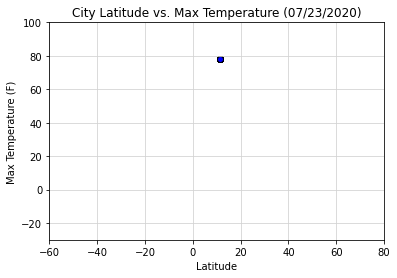

In [7]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Max Temperature (07/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-60,80)
plt.ylim(-30,100)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
#plt.savefig("Figures/fig1.png")
plt.show()

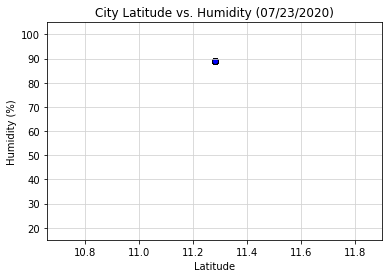

In [8]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Humidity (07/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
#plt.savefig("Figures/fig2.png")
plt.show()

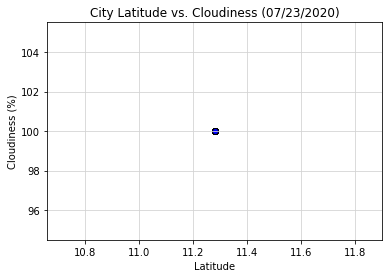

In [9]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness (07/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
#plt.savefig("Figures/fig3.png")
plt.show()

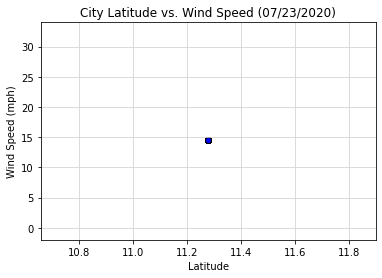

In [12]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Wind Speed (07/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
#plt.savefig("Figures/fig4.png")
plt.show()